In [ ]:
# Import the necessary libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Download historical stock price data for Apple from YahoFinance

In [7]:
# Define the ticker symbol and time range

start_date = "2010-01-01"
end_date = "2024-11-05"

#Downlod the historical data according to the date above

data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         AAPL      AAPL      AAPL      AAPL      AAPL   
Date                                                                          
2010-01-04 00:00:00+00:00  6.447411  7.643214  7.660714  7.585000  7.622500   
2010-01-05 00:00:00+00:00  6.458560  7.656429  7.699643  7.616071  7.664286   
2010-01-06 00:00:00+00:00  6.355828  7.534643  7.686786  7.526786  7.656429   
2010-01-07 00:00:00+00:00  6.344078  7.520714  7.571429  7.466071  7.562500   
2010-01-08 00:00:00+00:00  6.386253  7.570714  7.571429  7.466429  7.510714   

Price                         Volume  
Ticker                          AAPL  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800  


## Exploring the Data

In [8]:
data.info

<bound method DataFrame.info of Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2010-01-04 00:00:00+00:00    6.447411    7.643214    7.660714    7.585000   
2010-01-05 00:00:00+00:00    6.458560    7.656429    7.699643    7.616071   
2010-01-06 00:00:00+00:00    6.355828    7.534643    7.686786    7.526786   
2010-01-07 00:00:00+00:00    6.344078    7.520714    7.571429    7.466071   
2010-01-08 00:00:00+00:00    6.386253    7.570714    7.571429    7.466429   
...                               ...         ...         ...         ...   
2024-10-29 00:00:00+00:00  233.413193  233.669998  234.330002  232.320007   
2024-10-30 00:00:00+00:00  229.847122  230.100006  233.470001  229.550003   
2024-10-31 00:00:00+00:00  225.661728  225.910004  229.830002  225.369995   
2024-11-01 00:00:00+00:00  222.665024  222.9

In [61]:
data = data.isnull().sum()
data

0

In [9]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03
mean,65.799386,67.986343,68.655216,67.255210,67.939741,2.318498e+08
std,63.595873,63.265853,63.880811,62.583074,63.210259,2.183752e+08
min,5.785831,6.858929,7.000000,6.794643,6.870357,2.404830e+07
25%,17.370378,20.391787,20.518393,20.198393,20.397142,8.631980e+07
50%,34.196114,36.647499,36.875000,36.287498,36.689999,1.422440e+08
75%,123.825771,126.314999,127.924999,125.091248,126.709999,3.111836e+08
max,236.220108,236.479996,237.490005,234.449997,236.479996,1.880998e+09


In [28]:
# Rename the ADJ Close colum to Adj_Close

In [31]:
data = data.rename(columns={"Adj Close": "Adj_Close" })

In [32]:
data.index                                                                                                                      

DatetimeIndex(['2010-01-04 00:00:00+00:00', '2010-01-05 00:00:00+00:00',
               '2010-01-06 00:00:00+00:00', '2010-01-07 00:00:00+00:00',
               '2010-01-08 00:00:00+00:00', '2010-01-11 00:00:00+00:00',
               '2010-01-12 00:00:00+00:00', '2010-01-13 00:00:00+00:00',
               '2010-01-14 00:00:00+00:00', '2010-01-15 00:00:00+00:00',
               ...
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00',
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00',
               '2024-11-01 00:00:00+00:00', '2024-11-04 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3735, freq=None)

In [33]:
print (data.columns)

MultiIndex([('Adj_Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [34]:
data.shape

(3735, 6)

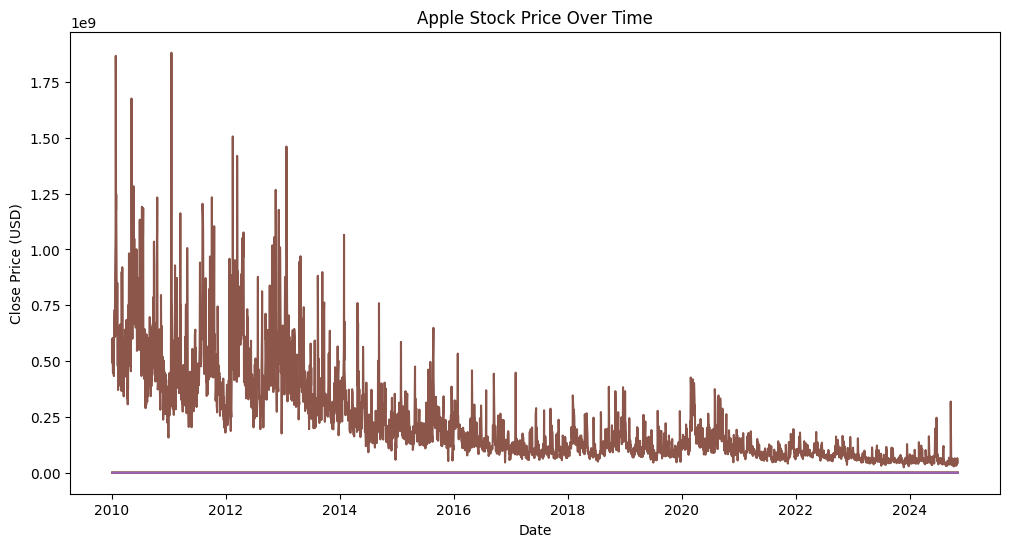

In [35]:
# Plot the closing price

plt.figure(figsize=(12, 6))
plt.plot(data, label="AAPL Close Price")
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
#plt.legend()
plt.show()

## Preprocesing the data

In [36]:
#Resample the data

In [51]:
daily_data = data.resample('D').mean()

In [52]:
daily_data

Price,Adj_Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447411,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05 00:00:00+00:00,6.458560,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08 00:00:00+00:00,6.386253,7.570714,7.571429,7.466429,7.510714,447610800.0
...,...,...,...,...,...,...
2024-10-31 00:00:00+00:00,225.661728,225.910004,229.830002,225.369995,229.339996,64370100.0
2024-11-01 00:00:00+00:00,222.665024,222.910004,225.350006,220.270004,220.970001,65276700.0


In [68]:
nan_summary = data.isna().sum()

# Print the number of NaN values for each column
print("Number of NaN values in each column:")
print(nan_summary)

AttributeError: 'numpy.int64' object has no attribute 'isna'

## Stationery Testing

In [22]:
## Checking if our data is stationery using the ADF (Augmented Dickey-Fuller) from the statsmodel Library

In [39]:
from statsmodels.tsa.stattools import adfuller

IndexError: invalid index to scalar variable.